In [1]:
# Import libraries
# Common imports
import numpy as np
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 


# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

#Data analysing
from sklearn.preprocessing import MinMaxScaler

#Classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [2]:
df_train = pd.read_csv("data_train.csv")
df_test = pd.read_csv("data_test.csv")

In [3]:
pd.set_option('display.max_columns',111)
df_train.tail(25)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32536,34,2,160216,0,13,0,1,0,0,1,0,0,55,0,1
32537,30,2,345898,1,9,0,6,0,1,0,0,0,46,0,0
32538,38,2,139180,0,13,2,3,4,1,1,15020,0,45,0,1
32539,71,5,287372,9,16,1,11,1,0,0,0,0,10,0,1
32540,45,0,252208,1,9,4,0,3,0,1,0,0,40,0,0
32541,41,5,202822,1,9,4,11,0,1,1,0,0,32,0,0
32542,72,5,129912,1,9,1,11,1,0,0,0,0,25,0,0
32543,45,4,119199,6,12,2,3,4,0,1,0,0,48,0,0
32544,31,2,199655,3,14,2,4,0,4,1,0,0,30,0,0
32545,39,4,111499,6,12,1,0,2,0,1,0,0,20,0,1


In [5]:
df = pd.concat([df_train, df_test], ignore_index=True)
print(df['income'].value_counts())
print(df_train['income'].value_counts())
print(f'Percentage of train set per full set: {df_train.shape[0]/df.shape[0]*100}')

0    37155
1    11687
Name: income, dtype: int64
0    24720
1     7841
Name: income, dtype: int64
Percentage of train set per full set: 66.66598419393145


In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [7]:
#Drop the redundant columns, education and education-num perform the same things
df = df.drop('education-num', axis=1)
df_train = df_train.drop('education-num', axis=1)
df_test = df_test.drop('education-num', axis=1)

In [8]:
##Separating categorical and continuous variables
#{cat: <45, cont:>45}
cat=[feature for feature in df.columns if df[feature].nunique()<45]
cont=[feature for feature in df.columns if df[feature].nunique()>45]

In [11]:
#Dataset contains only categorical data
df_cat = df[cat].copy()
df_cat.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [10]:
#Dataset contains only continuous data
df_cont = df[cont].copy()
df_cont['income'] = df['income'].copy()
df_cont.columns

Index(['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week',
       'income'],
      dtype='object')

<AxesSubplot:>

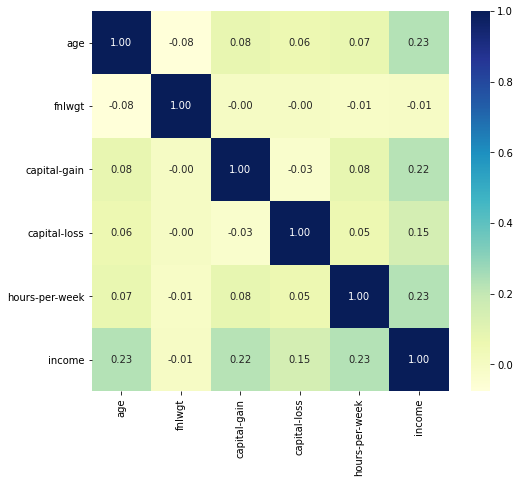

In [12]:
plt.figure(figsize=(8,7))
cor_map = df_cont.corr()
sns.heatmap(cor_map, annot=True, fmt='.2f', cmap='YlGnBu')

/Users/mvo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mvo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mvo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/

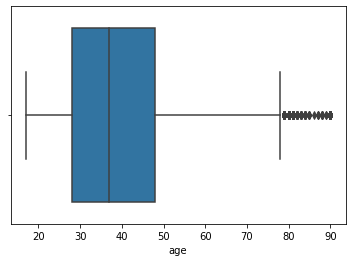

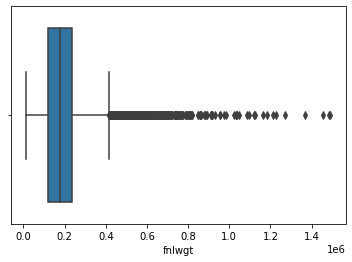

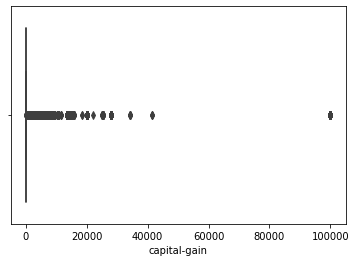

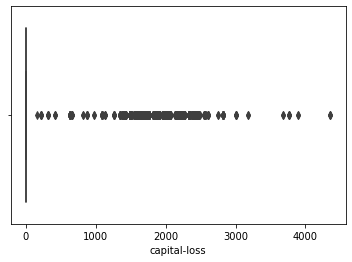

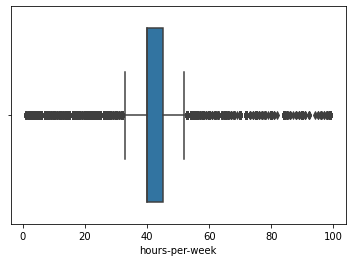

<Figure size 432x288 with 0 Axes>

In [62]:
#Boxplot of continuous data
for i in cont:
    sns.boxplot(df[i])
    plt.figure()

## Implementation: Data Exploration

As we can see that the last column from this dataset, 'income', will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

A premilinary investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:

- The total number of records, 'n_records'
- The number of individuals making more than \$50,000 annually, 'n_greater_50k'.
- The number of individuals making at most \$50,000 annually, 'n_at_most_50k'.
- The percentage of individuals making more than \$50,000 annually, 'greater_percent'.

In [13]:
# DONE: Total number of records
n_records = df['income'].count()

# DONE: Number of records where individual's income is more than $50,000
count = 0
count = [count+1 for income in df['income'] if income == 1]
n_greater_50k = sum(count)
 
# DONE: Number of records where individual's income is at most $50,000
n_at_most_50k = n_records - n_greater_50k

# DONE: Percentage of individuals whose income is more than $50,000
greater_percent = (n_greater_50k*100.0)/n_records

# Print the results
print("Total number of records: {}".format(n_records)) 
print("Individuals making more than $50,000: {}".format(n_greater_50k)) 
print("Individuals making at most $50,000: {}".format(n_at_most_50k)) 
print("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent)) 

Total number of records: 48842
Individuals making more than $50,000: 11687
Individuals making at most $50,000: 37155
Percentage of individuals making more than $50,000: 23.93%


### Data Loading and Feature Engineering

In [19]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder


X=df.copy()
X.drop('income',axis=1,inplace=True)
y=df['income']


In [98]:
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country']
numerical_columns = ['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week']

X = X[categorical_columns + numerical_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42,test_size=0.25)

categorical_encoder = OneHotEncoder(handle_unknown='ignore')
numerical_pipe = Pipeline([('imputer', SimpleImputer(strategy='mean'))])

preprocessing = ColumnTransformer(
                                [('cat', categorical_encoder, categorical_columns),
                                 ('num', numerical_pipe, numerical_columns)])
rf = Pipeline([
    ('preprocess', preprocessing),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])
rf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['age', 'fnlwgt',
                                                   'capital-gain',
                                                   'capital-loss',
                                  

### Accuracy of the Model

In [70]:
score1 = rf.score(X_train, y_train)
score2 = rf.score(X_test, y_test)

print("The accuracy of RandomForest model on the training set: {:.2f}%".format(score1*100))
print("The accuracy of RandomForest model on the testing set: {:.2f}%".format(score2*100))

The accuracy of RandomForest model on the training set: 99.98%
The accuracy of RandomForest model on the testing set: 85.42%


In [99]:
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))

[[8637  652]
 [1128 1794]]


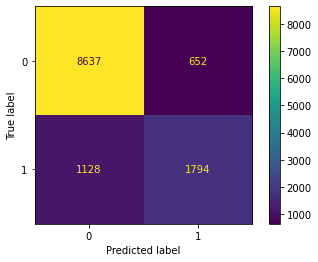

In [100]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf, X_test, y_test)  
plt.show()  

In [101]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred.round(2), digits =3))

              precision    recall  f1-score   support

           0      0.884     0.930     0.907      9289
           1      0.733     0.614     0.668      2922

    accuracy                          0.854     12211
   macro avg      0.809     0.772     0.787     12211
weighted avg      0.848     0.854     0.850     12211



In [102]:
# Calculate cv score with ROC_auc_ovr, cv =10

accuracy = cross_val_score(rf, X, y, scoring = 'roc_auc_ovr', cv=10)
print('Cross validation score with roc_auc_ovr = ', accuracy.mean())

Cross validation score with roc_auc_ovr =  0.9030821712567979


In [104]:
#Calculate roc_auc_score
from sklearn.metrics import roc_auc_score

print('Roc_auc_score =', roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

Roc_auc_score = 0.8999116071212121


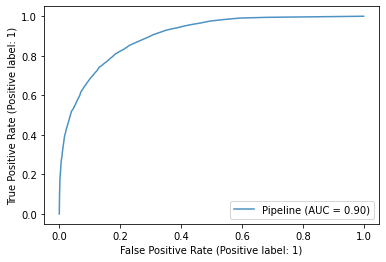

In [107]:
from sklearn.metrics import plot_roc_curve

ax = plt.gca()
rfc_disp = plot_roc_curve(rf, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

In [ ]:
rf_random.best_params_


In [ ]:
rf_random.cv_results_


In [108]:

for random_state in range(4):
    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=random_state, test_size=0.2)

    categorical_encoder = OneHotEncoder(handle_unknown='ignore')
    numerical_pipe = Pipeline([('imputer', SimpleImputer(strategy='mean'))])

    preprocessing = ColumnTransformer(
                                [('cat', categorical_encoder, categorical_columns),
                                 ('num', numerical_pipe, numerical_columns)])
    rf = Pipeline([
                    ('preprocess', preprocessing),
                    ('classifier', RandomForestClassifier(random_state=42))])
    rf.fit(X_train, y_train)
    score=rf.score(X_test, y_test)
    print("Evaluating the model on the testing set yields an accuracy of {:.2f}% with random state {}".format(score*100, random_state))

Evaluating the model on the testing set yields an accuracy of 85.47% with random state 0
Evaluating the model on the testing set yields an accuracy of 85.34% with random state 1
Evaluating the model on the testing set yields an accuracy of 85.24% with random state 2
Evaluating the model on the testing set yields an accuracy of 85.40% with random state 3


### Tree’s Feature Importance from Mean Decrease in Impurity (MDI)

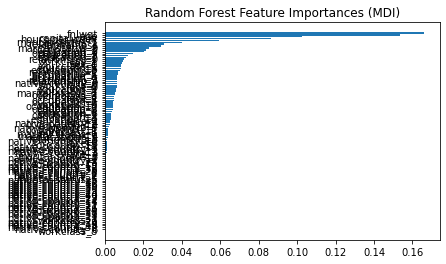

In [51]:
ohe = (rf.named_steps['preprocess']
         .named_transformers_['cat'])
feature_names = ohe.get_feature_names(input_features=categorical_columns)
feature_names = np.r_[feature_names, numerical_columns]

tree_feature_importances = (
    rf.named_steps['classifier'].feature_importances_)
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots()
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_title("Random Forest Feature Importances (MDI)")

plt.show()

In [50]:
X_train.shape
X_test.shape

(14653, 13)

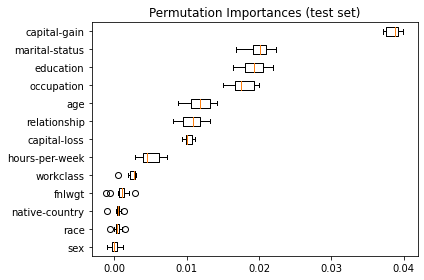

In [47]:
result = permutation_importance(rf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (Testing set)")
fig.tight_layout()
plt.show()

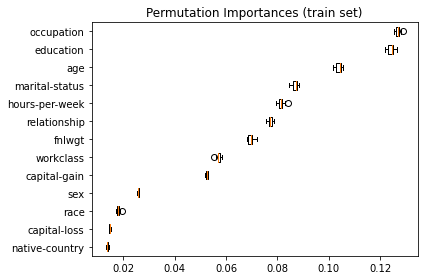

In [48]:
result = permutation_importance(rf, X_train, y_train, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_train.columns[sorted_idx])
ax.set_title("Permutation Importances (train set)")
fig.tight_layout()
plt.show()

#### Cross-validation

In [110]:
from sklearn.model_selection import cross_val_score
classifier = RandomForestClassifier(random_state=42)
scores = cross_val_score(classifier, X, y, cv=5) # cv is the number of folds (k)
print(scores)

# It is always a good practice to show the mean AND the standard deviation of the model accuracy
print("Accuracy: {:.2f}% (+/- {:.2f})".format(scores.mean() * 100, scores.std() * 100))

[0.8561777  0.85842973 0.86046274 0.85370598 0.85370598]
Accuracy: 85.65% (+/- 0.27)


### Model Tuning


In [73]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [114]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [115]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)



Model Performance
Average Error: 0.1951 degrees.
Accuracy = -inf%.


In [118]:
# Random Forest: with GridSearchCV to improve the score
from sklearn import metrics

# Train and fit the Random Forest Classification model
randomforest = RandomForestClassifier(n_estimators=100,random_state = 42)

# GridSearchCV
param_grid = {
    'n_estimators': [200, 300],
    'max_features': ['sqrt', 'log2']
}

# with Kfold=15
CV_rfc = GridSearchCV(estimator=randomforest, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print('best_estimator = ',CV_rfc.best_estimator_)
y_pred = CV_rfc.predict(X_test)

print(confusion_matrix(y_test, y_pred))
# Classification report
print(metrics.classification_report(y_test, y_pred.round(), digits=3))
# Calculate cv score with 'roc_auc_ovr' scoring and 10 Kfolds
accuracy = cross_val_score(randomforest, X, y,scoring = 'roc_auc_ovr',cv=5)
print('cross validation score with roc_auc_ovr scoring=',accuracy.mean())

# Calculate roc_auc score
print('roc_auc_score=',roc_auc_score(y_test,CV_rfc.predict_proba(X_test)[:, 1]))


best_estimator =  RandomForestClassifier(max_features='sqrt', n_estimators=200, random_state=42)
[[6873  527]
 [ 903 1466]]
              precision    recall  f1-score   support

           0      0.884     0.929     0.906      7400
           1      0.736     0.619     0.672      2369

    accuracy                          0.854      9769
   macro avg      0.810     0.774     0.789      9769
weighted avg      0.848     0.854     0.849      9769

cross validation score with roc_auc_ovr scoring= 0.905453238729045
roc_auc_score= 0.9036945113116494


In [ ]:
def single_grid_search(X_train, y_train):
    """
    Performs a grid search using the training set given.
    """
    # Setting all the parameters we want to test
    params = {
        'max_features' : np.arange(0.1,1,0.1).tolist(), #Number of features to consider as a fraction of all features
        'max_depth': [1,2,4,8, None] # Depth of the tree
    }

    gridsearch = GridSearchCV(estimator = rf,
                            param_grid = params,
                            scoring = 'accuracy', 
                            cv = 5, # Use 5 folds
                            verbose = 0,
                            n_jobs = -1 #Use all but one CPU core
                            )

    # As we are doing cross-validation on the 

In [ ]:
# Create k train-test splits using KFold
from sklearn.model_selection import KFold

# Using KFold instead of calling multiple times train_test_split to ensure that each
# sample goes into a single split only
kf = KFold(n_splits=5, random_state=42, shuffle=True)  #why random_state = 45

split = 0
scores = []
for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    result = single_grid_search(X_train, y_train)
    
    decision_tree = result.best_estimator_
    score = rf.score(X_test, y_test)
    scores.append(score)
    print("### Split {}: Accuracy is {:.2f}% ###".format(split := split + 1, score*100))

print(f"RESULT: {result},\n==== Decision_tree: {decision_tree}")
print("\nThe mean generalization accuracy of the model is {:.2f}% (+/- {:.2f}%)".format(np.mean(scores) * 100, np.std(scores) * 100))

### Listing of attributes:

Target: income: >50K, <=50K.

 - age: continuous.
 - workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
 - fnlwgt (final weight): continuous.
 - education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
 - education-num: continuous.
 - marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
 - occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
 - relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
 - race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
 - sex: Female, Male.
 - capital-gain: continuous.
 - capital-loss: continuous.
 - hours-per-week: continuous.
 - native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
 
https://github.com/becodeorg/GNT-Arai-2.31/tree/master/content/additional_resources/datasets/US%20Income